In [20]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Dataset
### Using the MNIST Fashion Dataset, includes 60,000 images for training and 10,000 images for validation/testing.

In [21]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into testing and training

In [22]:
train_images.shape

train_images[0, 23, 23] # have a look at one pixel
# print(train_images)

# pixel values are between 0 and 255, 0 being black and 255 being white.
train_labels[:10] # have a look at the first 10 training labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

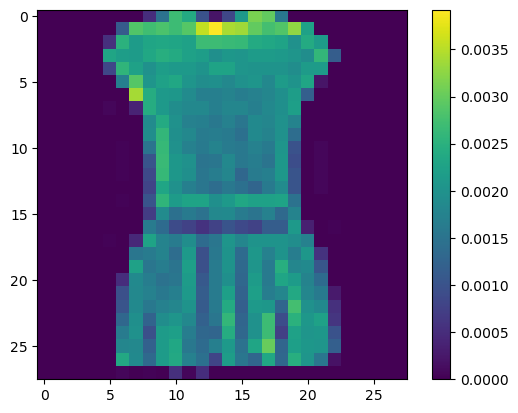

In [32]:
plt.figure()
plt.imshow(train_images[3]) #love the dress :D
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

### Sampling scale all of our greyscale pixel values(0 - 255) to be between 0 and 1.

In [33]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Building the Model
### Layer 1: Input layer. it will consist of 784 neurons. input shape of (28, 28).
### Layer 2: The first and only hidden layer. It will be fully connected and each neuron from the previous layers.
### Layer 3: Output layer. All the values of our neurons add up to 1, and that there are between 0 - 1.

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer 1
    keras.layers.Dense(128, activation='relu'), # hidden layer 2
    keras.layers.Dense(10, activation='softmax') # output layer 3
])



# Compiling the Model

In [36]:
# hyper parameter
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Traning the Model

In [37]:
model.fit(train_images, train_labels, epochs=10) # pass the date, labels and epochs and watch the magica!
# less epochs will be better


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.1007 - loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.1252 - loss: 2.3005
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.1585 - loss: 2.2899
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.1868 - loss: 2.2640
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.2127 - loss: 2.2247
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.2025 - loss: 2.1770
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.2338 - loss: 2.1267
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.2206 - loss: 2.0766
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.2513 - loss: 2.0248
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.2552 - loss: 1.9806


# Evaluationg the Model



In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.3155 - loss: 1.9500
Test accuracy: 0.313400000333786


# Making Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step
Sneaker


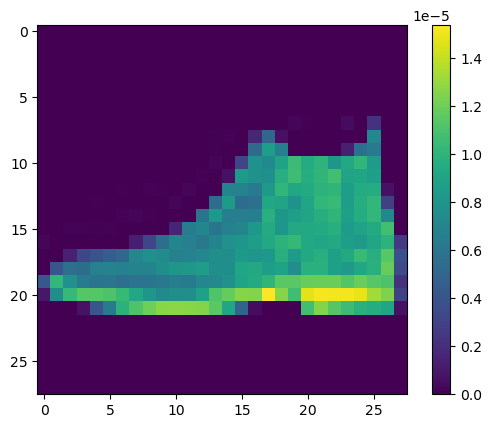

In [46]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0]) # return the index of the maximum value in the list.
test_labels[0]
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0]) 
plt.colorbar()
plt.grid(False)
plt.show()

# Verifying Predictions



In [66]:
COLOUR = 'Black' # use black colour to show the text
plt.rcParams['text.color'] = COLOUR
plt.rcParams['axes.labelcolor'] = COLOUR

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


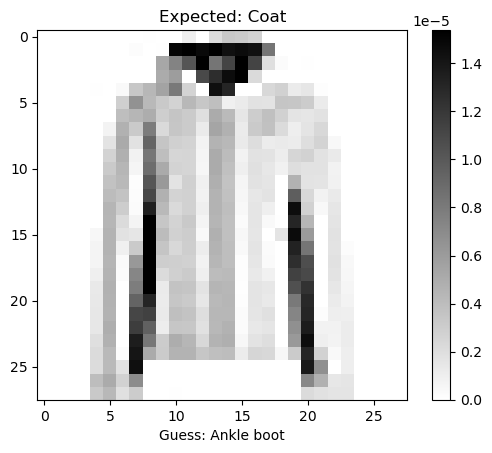

In [67]:
def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    
    show_image(image, class_names[correct_label], predicted_class)
    
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
            else:
                print("Try again...")
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
        

***it is ridiculous, how come you guessed wrong??!***